# Исследование о продажах игр    

Исслесследование делается для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры.  
   
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  
  
Имеем данные до 2016 года и мы планируем кампанию на 2017-й.   

### Изучение общей информации о файле с данными

In [1]:
# импортиркем библиотеки

import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# загружаем датасет и присваем ему переменную data

data = pd.read_csv('/datasets/games.csv')

In [3]:
# выводим первые 10 строк для первого изучения имеющихся данных

data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Описание данных**  

- ``Name`` — название игры
- ``Platform`` — платформа
- ``Year_of_Release`` — год выпуска
- ``Genre`` — жанр игры
- ``NA_sales`` — продажи в Северной Америке (миллионы проданных копий)
- ``EU_sales`` — продажи в Европе (миллионы проданных копий)
- ``JP_sales`` — продажи в Японии (миллионы проданных копий)
- ``Other_sales`` — продажи в других странах (миллионы проданных копий)
- ``Critic_Score`` — оценка критиков (максимум 100)
- ``User_Score`` — оценка пользователей (максимум 10)
- ``Rating`` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков». 

По выведенной таблице видно, что названия столбцов написаны верблюжьим регистром. Для удобства работы приведем их все к змеиному регистру. 

In [4]:
# приводим названия к нижнему регистру

data.columns = data.columns.str.lower()

In [5]:
# выводим названия столбцов и проверяем все ли написания верны

data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [6]:
# получаем общую информацию о таблице

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Видно, что в таблице:**  
- 11 столбцов и 16715 строк
- пропуски в: name, year_of_release, genre, critic_score, user_score, rating
- замены типа данных требуется в: year_of_release, user_score
- в critic_score тип данных float вместо int, его можно оставить в таком виде, это не помешает анализу

In [7]:
# проверим наличие явных дубликатов 

data.duplicated().sum()

0

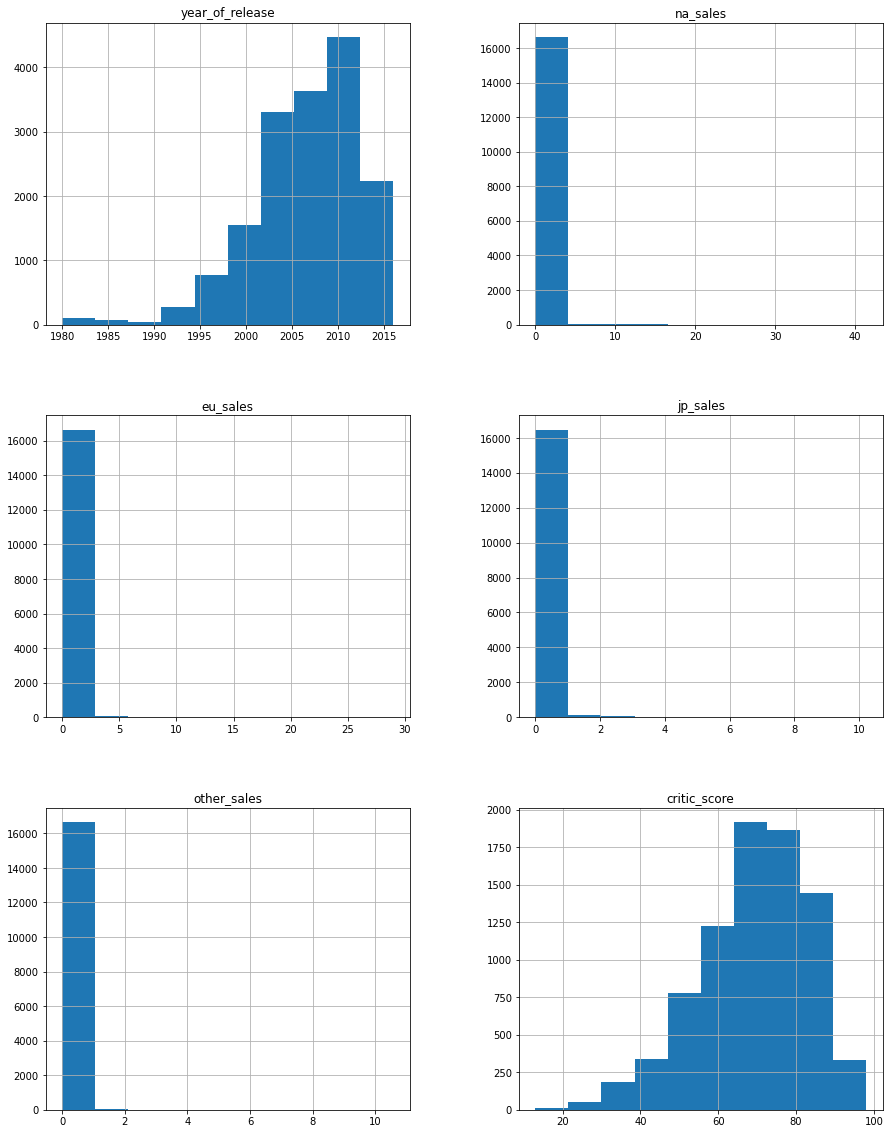

In [8]:
data.hist(figsize=(15, 20));

**Вывод на этом этапе:**    
- имеем 11 столбцов и 16715 строк
- есть пропущенные значения, которые будем обрабатывать следующими шагами
- названия столбцов были написаны в верблюжбем регистре, что неудобно для дальнейшей работы - привели их к змеиному регистру
- гистограммы в большинстве случаев на данном этапе не информативны и требуют дальнейшего рассмотрения, когда будут обработаны пропуски в данных; сейчас же можно только сказать, что количество игр после 1995 года возрастает и достигает пика к 2010 году; и что наибольшее число значений в оценках критиков располагается между 60 и 90 баллами
- явных дубликатов в данных нет, значит дальше нужнот будет проводить проверку только на неявные дубликаты
- имеются данные с неверным форматом, заменим их на этапе предобработки данных

### Подготовка данных

Мы уже проработали названия столбцов и проверили неявные дубликаты.  
Теперь займемся типом данных,  обработкой пропусков и подсчетом суммарных продаж во всех регионах.

**Заменим тип данных в указанных выше столбцах.**  
  
Перед этим проверим значения в столбцах, чтобы случайно ничего не выкинуть или не заполнить не верным значением.

In [9]:
# проверяем уникальные значения в столбце с годом выпуска игры

data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [10]:
# поменяем тип данных в годе выпуска

data['year_of_release'] = data['year_of_release'].astype('Int64')

In [11]:
# проверим заменился ли тип данных

data['year_of_release'].dtype

Int64Dtype()

In [12]:
# проверяем уникальные значения в столбце с пользовательской оценкой

data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В списке значений есть tbd. Словарь выдает такое определние данному значению: TBD — сокращение от To Be Determined. Служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований.  
Значит они не известны и можно их привети к NaN.


In [13]:
# заменим в столбце user_score tbd на NaN

#data['user_score'] = data['user_score'].replace('tbd', np.nan, regex=True)

In [14]:
# заменим тип данных в столбцк user_score на float вместо object

#data['user_score'] = data['user_score'].astype(float)

data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [15]:
# проверим изменился ли тип данных

data['user_score'].dtype

dtype('float64')

In [16]:
# проверим общую картину по данным

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


**Переходим к обработке пропусков**

In [17]:
# посмотрим в каких столбцах есть пропуски и сколько их

data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [18]:
# посмотрим процентное соотнощение пропусков к общему количеству данных

(data.isna().mean()*100).round(3)

name                0.012
platform            0.000
year_of_release     1.609
genre               0.012
na_sales            0.000
eu_sales            0.000
jp_sales            0.000
other_sales         0.000
critic_score       51.319
user_score         54.592
rating             40.479
dtype: float64

Пропущены значения в столбцах: 
- ``name``: 2 пропуска - информация без названия игры не имеет смысла, ее никак не проанализировать, не ясно о чем речь. 
- ``year_of_release``: 269 - эти пропуски мы уже видели на этапе изменений типа данных, теперь их надо будет изучить более детально
- ``genre``: 2 пропуска
- ``critic_score``: 8578 пропусков
- ``user_score``: 9125 пропусков
- ``rating``: 6766 пропусков

In [19]:
# посмотрим на строки у пропущенных игр с именами

data[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Видно,  что тут же и пропущенные жанры игр, оценки критиков и пользователей,рейтинг.  
Удалив эти две строки, мы ничего не теряем и к тому же убираем сразу пропуски в столбце с жанров. 

In [20]:
# удаляем пустые строки из столбца name

data = data.dropna(subset=['name'])

In [21]:
# проверяем количество строк после удаления

data.shape

(16713, 11)

In [22]:
# выведем уникальные значения года выпуска

data['year_of_release'].unique()

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000, <NA>, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 38, dtype: Int64

In [23]:
# посмотрим данные в таблице в играх с пропущенным годом

data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [24]:
# посмотрим на распределние данных и среднее и медианное значения годов

data['year_of_release'].describe()

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

Имеем 269 пропусков NaN. Cо средним значением 2006 год, и медианным годом 2007.
  
Пропущенный год нет смысла заполнять ни медианой ни средним ни нулевыми значениями, так как игры между собой не связаны и это может дать искажение в данных для дальнейшего анализа.   
  
Можно попробовать заполнить пропущенные годы из игр с таким же названием с других платформ или вытащить год из тех названий, где вместе с текстом идет цифра года (или похожая на год). Но при консультации с игроманами выяснилось, что часто игры на разных платформах выходят в разные года, так как это могут быть разные версии под разные задачи (десктоп, приставки и тд). И так же, что в названиях часто указан не тот год. Например, ФИФА 2004 вышла в 2003 году.  
  
Поэтому проверим какой процент занимает занимают пропуски в годах от всей таблицы и если он маленький и незначительный, то эти строки можно удалить, так как год может быть важен для дальнейшего анализа.  

In [25]:
# посчитаем долю пропущенных значений в годе к общему числу строк

nan_year_proportion = (269 / 16715)*100
nan_year_proportion

1.609332934489979

Процент 1,6 незненачительный. Эти строки можно удалить, сильной потери не будет.

In [26]:
data = data.dropna(subset=['year_of_release'])

In [27]:
data.shape

(16444, 11)

In [28]:
# посмотрим, какие данные имеем в оценке критиков

data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [29]:
# посмотрим процент пропущенных значений к общему количеству

nan_critic_proportion = (8461 / 16715)*100
nan_critic_proportion

50.61920430750823

In [30]:
# посмотрим медиану и среднее

data['critic_score'].describe()

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

Среднее значение оценки критиков 67, а медианное значение - 71. При этом пропусков у нас 51 процент от всего массива данных.  
При заполнении этими значениями пропусков есть вероятность появление сильных выбросов на медианном или среднем значении.  
Поэтому оставим эти пропуски не обработанными. 

In [31]:
# посмотрим, какие данные имеем в оценке критиков

data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Для проверки на неявные дубликаты, посмотим расшифровку аббривеатур рейтингов: 
- ``E`` - Everyone — для всех
- ``M`` - Mature — от 17 лет
- ``T`` - Teen — подросткам 13—19 лет
- ``E10+`` - Everyone 10 and older — для всех старше 10 лет
- ``K-A`` - For Kids to Adults - для всех, такая аббривеатура использовалась до 1998 года и затем сменилась на E 
- ``AO`` - Adults Only 18+ — только для взрослых
- ``EC`` -  Early childhood — для детей младшего возраста
- ``RP`` - Rating Pending — рейтинг ожидается  
  
Видим, что все-таки неявные дубликаты есть: K-A и E. Поскольку E более современный, переименуем K-A на него.


In [32]:
# проведем замену рейтинг K-A на E

data['rating'] = data['rating'].str.replace('K-A','E')

In [33]:
#  проверим заменилось ли

data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

In [34]:
# посмотрим данные в таблице в играх с пропущенным рейтингом

data[data['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [35]:
# посмотрим процент пропущенных значений к общему количеству

nan_rating_proportion = (6676 / 16715)*100
nan_rating_proportion

39.94017349685911

Пропусков 40 процентов от всего массива данных. Это много.   
Поскольку рейтинги обозначены аббривеатурами, то заполнить пустые значения можно только наиболее часто встречающимся рейтингом, а это даст искажение и выбросы в данных.  
~~Оставим эти пропуски не обработанными.~~  
Вставим вместо пропусков значение Unknown

In [36]:
# вставим на место пропущенных значение unknown

data['rating'] = data['rating'].fillna('unknown')

In [37]:
# првоерим изменения

data['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

**Посчитаем суммарные продажи во всех регионах**

In [38]:
# сложим продажи по каждому региону и запишем их в новый столбец

#data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [39]:
# выводем таблицу и посмотрим добавился ли столбец с общей суммой продаж

data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown,28.31


**Вывод по подготовке данных:**  
  
- изменили тип данных у year_of_release и user_score
- удалили строки без названия игр и жанра
- удалили строки без указанного года выпуска игры
- ``пропуски в столбце rating замены заглушкой 'unknown'``
- оставили пропуски в critic_score, user_score, чтобы не было выбросов в данных в дальнейшем анализе
- посчитали общую сумму продаж по всем регионам для каждой игры и добавили значения в новый столбец

### Исследовательский анализ данных

Поосмотрим, сколько игр выпускалось в каждый указанный в таблице год.

In [40]:
# считаем количество выпусков игр по годам

(data.pivot_table(index='year_of_release', values='name', aggfunc='count')
 .sort_values(by='name', ascending=False))

,name
year_of_release,
2008,1427
2009,1426
2010,1255
2007,1197
2011,1136
2006,1006
2005,939
2002,829
2003,775


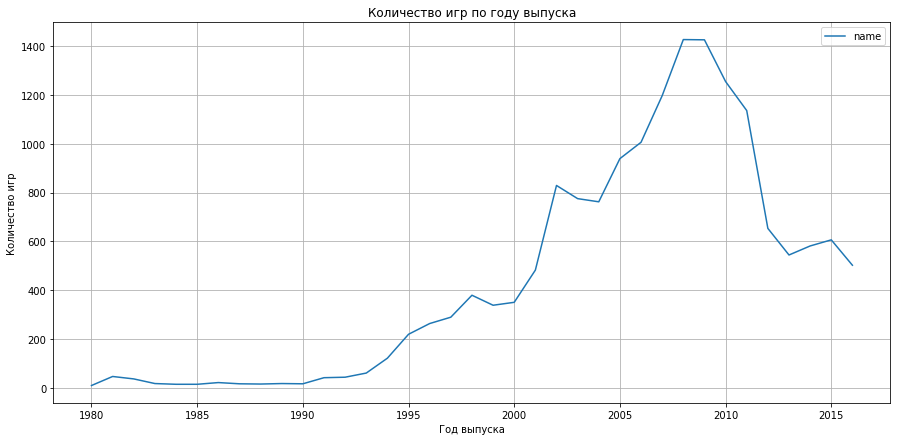

In [41]:
# посмотрим на график

(data.pivot_table(index='year_of_release', values='name', aggfunc='count')
.plot(title='Количество игр по году выпуска', 
      xlabel='Год выпуска', 
      ylabel='Количество игр', 
      grid=True, 
      figsize=(15,7)));

При просмотре количества выпущенных игр по годам, видно, что не все данные акутальны. Видно, что постепенный рост начинается с 1990х годов. Как раз в это время начался переход на 3D графику и в принципе пошло бурное развитие техники. Сильный рост начинается с 2000х годов. Цитата: "2000-е (десятилетие) продемонстрировали инновации как на консолях, так и на ПК, а также растущую конкуренцию на рынке портативных игровых систем. Влияние более широкой доступности Интернета привело к новым изменениям в игровом процессе, изменениям в игровом оборудовании и внедрению онлайн-сервисов для консолей."  
В 2005 и ближе к 2010 идет пик данных,  а к 2014 и до 2016 уже более одинаковые значения. Скорее всего самый актуальный период для анализа будет 2014-2016 год.  
Посмотрим на распределение по годам по платформам, чтобы дальше исходя из данного вывода и данных по платформам выбрать актуальный временной период для дальнейшего анализа.


In [42]:
data['name'].nunique()

11426

In [43]:
(data.pivot_table(index='name', values='total_sales', aggfunc='count')
 .sort_values(by='total_sales', ascending=False))

,total_sales
name,
Need for Speed: Most Wanted,12
FIFA 14,9
Ratatouille,9
LEGO Marvel Super Heroes,9
Cars,8
...,...
In the Hunt,1
Inazuma Eleven,1
Inazuma Eleven 2,1


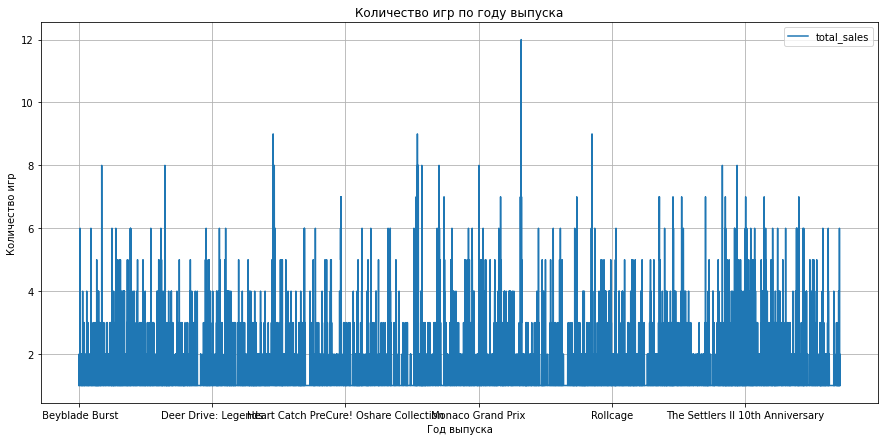

In [44]:
(data.pivot_table(index='name', values='total_sales', aggfunc='count')
 .plot(title='Количество игр по году выпуска', 
       xlabel='Год выпуска', 
       ylabel='Количество игр', 
       grid=True, 
       figsize=(15,7)));

In [45]:
data['name'].value_counts()

Need for Speed: Most Wanted                      12
LEGO Marvel Super Heroes                          9
FIFA 14                                           9
Ratatouille                                       9
Monopoly                                          8
                                                 ..
Virtua Fighter 4: Evolution                       1
Dragon Quest X: All in One Package                1
Sega Arcade Gallery                               1
Soccer                                            1
Saenai Kanojo no Sodatekata: Blessing Flowers     1
Name: name, Length: 11426, dtype: int64

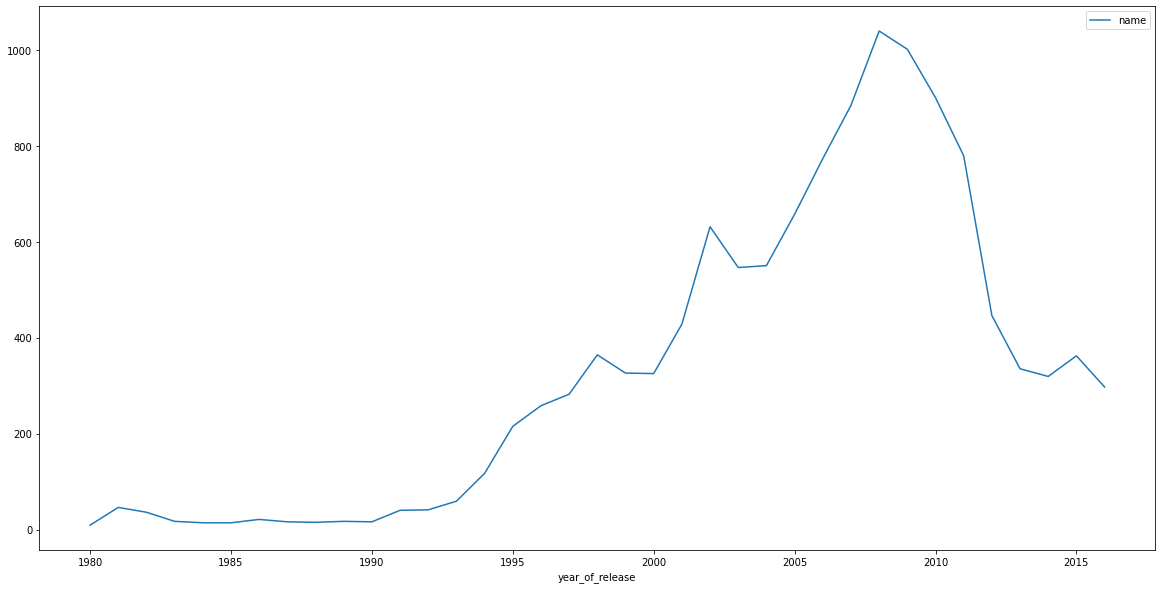

In [46]:
data.pivot_table(index='year_of_release', values='name', aggfunc=pd.Series.nunique).plot(figsize=(20,10));

**Посмотрим на общие продажи по платформам.**

In [47]:
# выведем сводную таблицу по платформам

sales_by_platform = (data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
                     .sort_values(by='total_sales', ascending=False))
sales_by_platform

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [48]:
# выведем самые большие суммарные продажи

sales_by_platform.head(10)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [49]:
# сделаем выборку по топ 10 платформам для построения графика по годам

top_platforms = data.query("platform == ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']")

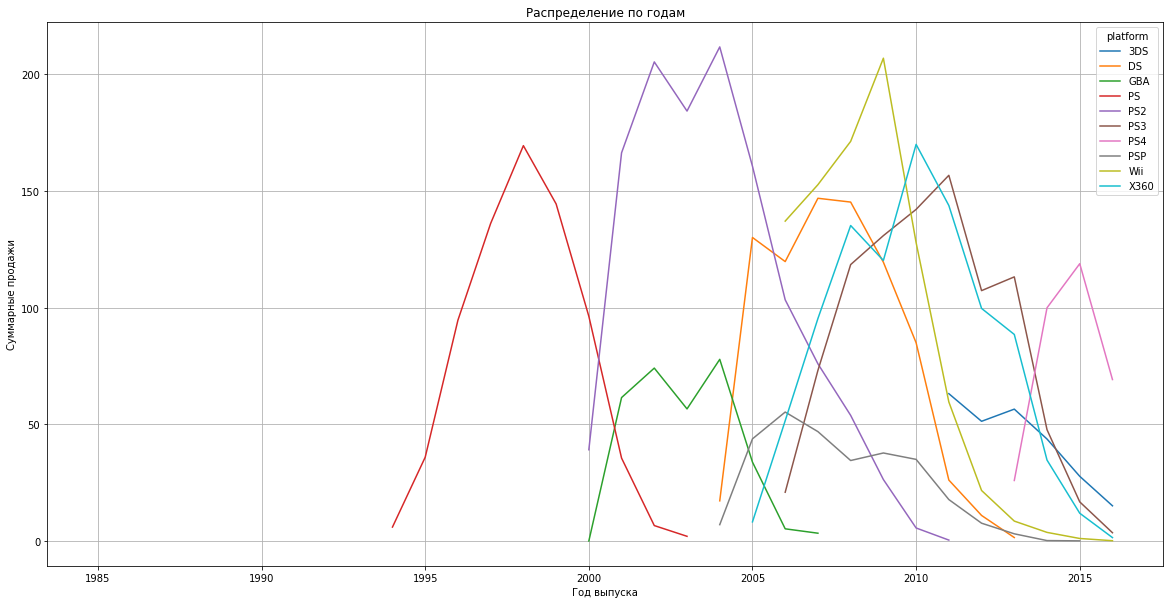

In [50]:
# строим график распрделения продаж каждой платформы по годам

(top_platforms.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum')
 .plot(title='Распределение по годам', 
      xlabel='Год выпуска', 
      ylabel='Суммарные продажи', 
      grid=True, 
      figsize=(20,10))); 

Судя по графику топ 10 платформ, срок жизни платформы 8-10 лет.  
  
У 2016 году видно как продажи идут на убыль. Поскольку мы анализируем дисковые копии игр, то можно предположить, что такое падение связано с бумом продах цифровых доступов к играм, выхода консолей и ростом быстрого интернета. 
  
При этом в топе к 2016 году по количеству суммарной прибыли на плаву платформы PS4, 3DS, PS3, X360, Wii (продажи этой платформы уже очень близки к нулю)  
  
Посмотрим, что это за платформы:
- ``PS4`` - PlayStation 4 входит в семейство игровых приставок PlayStation и была выпущена на смену PlayStation 3
- ``3DS`` - Nintendo 3DS портативная игровая система производства Nintendo, способная создавать трёхмерный эффект изображения за счёт автостереоскопии, то есть без использования специальных очков
- ``PS3`` - PlayStation 3 игровая приставка седьмого поколения, третья основная в семействе игровых систем PlayStation
- ``X360`` - Xbox 360 вторая по счёту игровая приставка компании Microsoft, которая последовала за Xbox. 
- ``Wii`` - Wii игровая приставка 7-го поколения, 5-я домашняя консоль фирмы Nintendo и наследница Nintendo GameCube
  
Из этого видно, что к 2016 году на физическом рынке продаж игр привалируют различные консоли и приставки. Из них потенциально прибыльные  PS4, 3DS.  
  
Так же из этого и предыдущего графика можно сделать вывод, что наиболее актуальный временной период для анализа будет с 2014 по 2016 год. Поэтому дальше следует сделать выборку из этих годов и уже на ней провести дальнейший анализ.

In [51]:
# создаем выборку только для игра, которые от 2014 года выпуска

data = data.query("year_of_release >= 2014")

In [52]:
# посмотрим какие платформы наиболее прибыльные на выбранном отрезке времени

sales_by_platform_from_2014 = (data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
                     .sort_values(by='total_sales', ascending=False))
sales_by_platform_from_2014

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


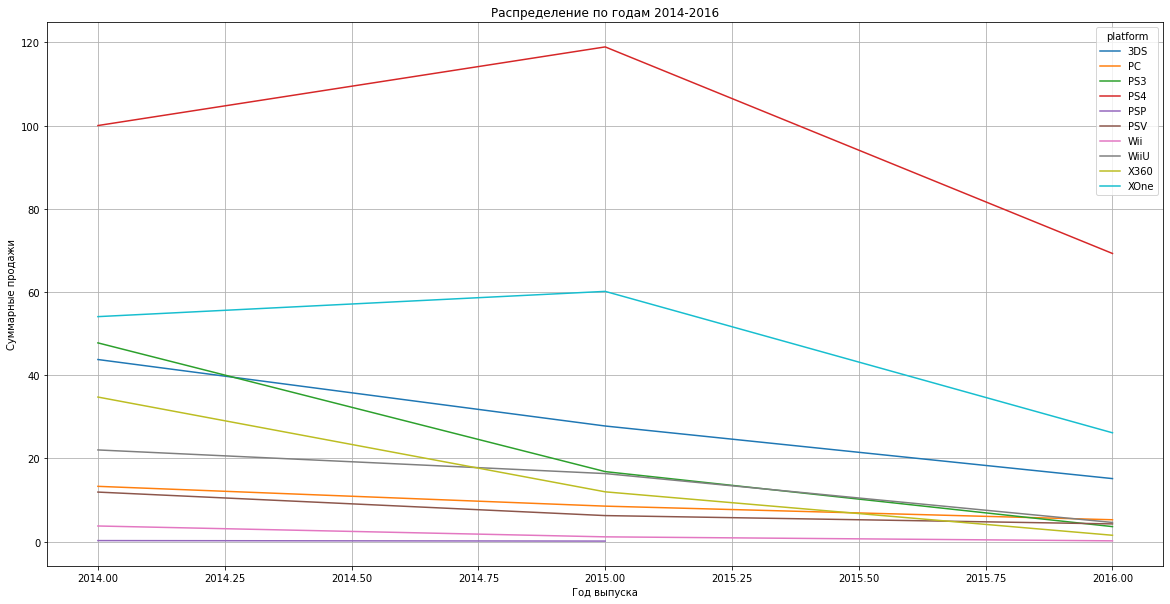

In [53]:
# посомтрим их на графике

(data.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum')
 .plot(title='Распределение по годам 2014-2016', 
       xlabel='Год выпуска', 
       ylabel='Суммарные продажи', 
       grid=True, 
       figsize=(20,10))); 

В топе 2014-2016 годов по количеству суммарной прибыли платформы PS4, XOne, 3DS, PS3, X360, WiiU (продажи этой платформы отлчаются от предыдущей на 5 млн)    
    
В топ на второе место на выбранном отрезеке времени вышла платформа XOne - ``Xbox One`` — третья по счёту игровая приставка от компании Microsoft, являющаяся преемницей Xbox 360. Все конкуренты есть в топе.  
    
По графику же видно, что стабильно идет продажа PC (personal computer), хотя в таблице эта платформа на 7 месте, ее стоит учитывать так как продажи стабильные.   
  
Данные за 2016 год не полные - это значит, что суммарные продажи могут еще подрасти и графики поднимуться. 

In [54]:
# выводим таблицу для проверки

data.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,unknown,7.55
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,unknown,7.39
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


In [55]:
# проверим сколько значений осталось

data.shape

(1689, 12)

In [56]:
# построим диаграмму размаха по глобальным продажам игр в разбивке по платформам

#(data.pivot_table(index = 'name', columns = 'platform', values = 'total_sales', aggfunc = 'sum')
 #.plot(title='Распределение по платформам', 
      # xlabel='Платформа', 
      # ylabel='Суммарные продажи', 
      # kind='box',
      # ylim=(0,1.9), 
      # figsize=(17,12)));

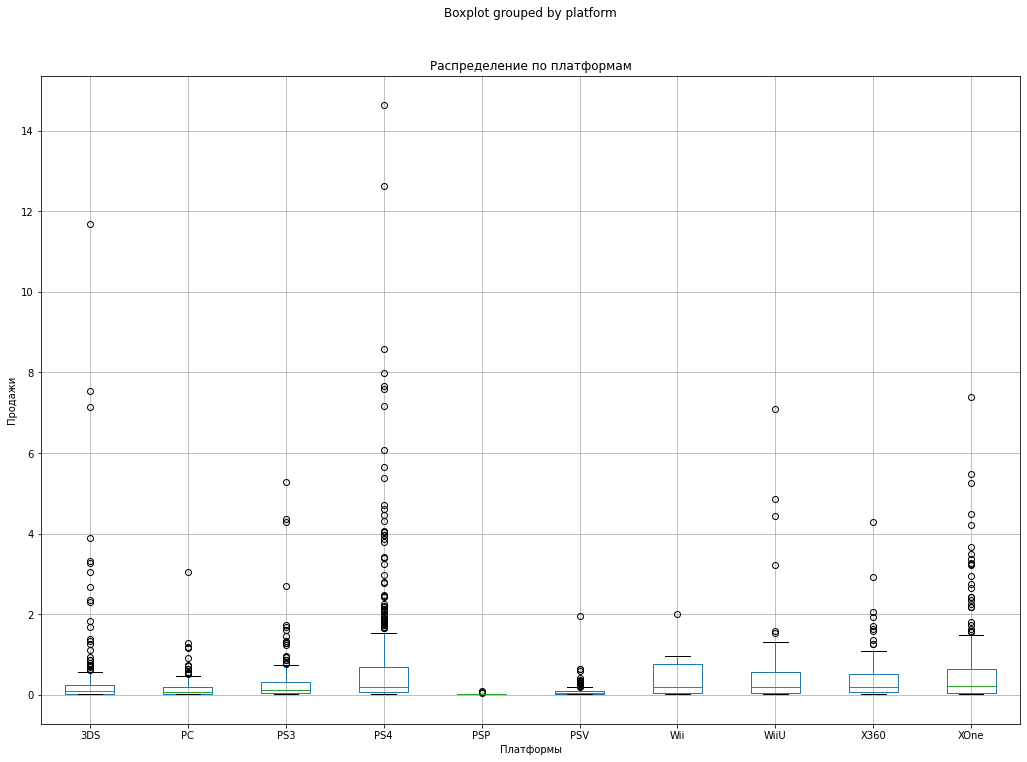

In [57]:
# построим диаграмму размаха по глобальным продажам игр в разбивке по платформам

(data.boxplot(by='platform', 
              column='total_sales',
              grid= True,
              figsize=(17,12))
 .set(title='Распределение по платформам', 
      xlabel='Платформы', 
      ylabel='Продажи'));

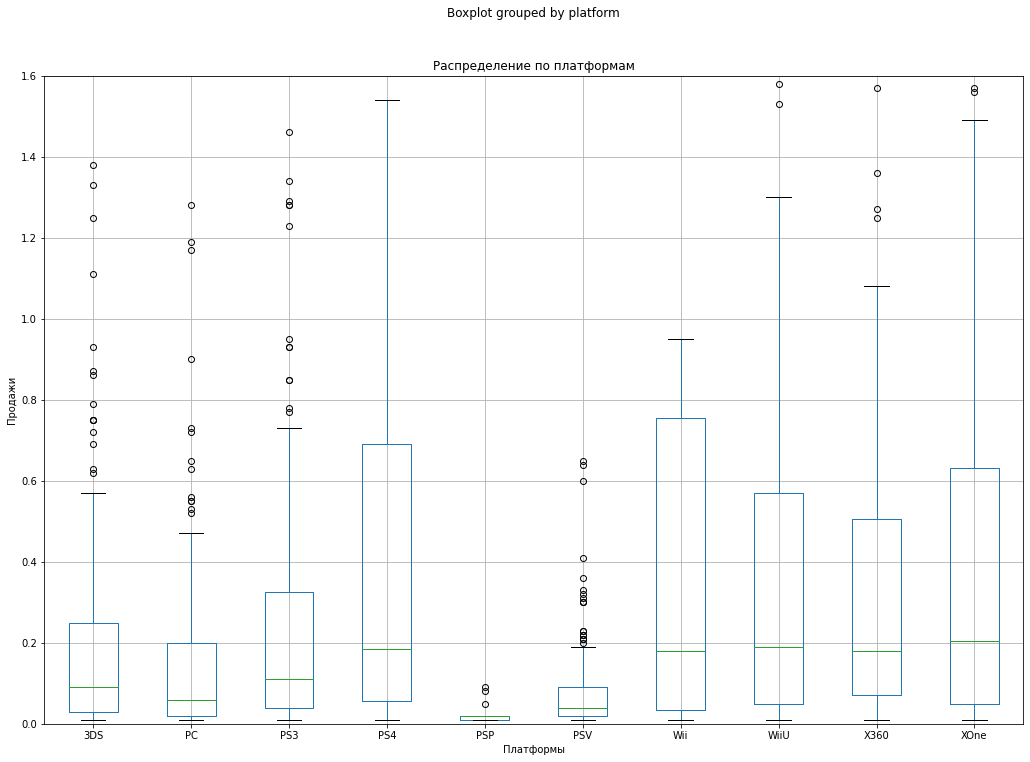

In [58]:
# построим укрупненную диаграмму рассеяния, чтобы посмотреть на медианные значения и 75% квантиль

(data.boxplot(by='platform', 
              column='total_sales',
              grid= True,
              figsize=(17,12))
 .set(title='Распределение по платформам', 
      xlabel='Платформы', 
      ylabel='Продажи',
      ylim=([0,1.6])));

Из диаграмм рассеивания видно, что:
- медианные значения похожи у платформ PS4, XOne
- чуть ниже медианные значения у Wii,WiiU, X360
- очень мало данных у PSP - это связано с тем, что их поставки прекратились в 2014 году и производства, а в 2016 полностью прекратился выпуск UMDs (Universal Media Disc (UMD) — оптический накопитель, разработанный компанией Sony в 2004 году для использования в игровых приставках PlayStation Portable)
- низкие медианные значения у PS3, 3DS,PC, PSV
  
Ранее в выборку не попадала платформа XOne, проверим дату ее выхода

In [59]:
data.query("platform == 'XOne'")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,unknown,7.39
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
...,...,...,...,...,...,...,...,...,...,...,...,...
16630,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01
16643,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,NaN,6.6,E,0.01
16645,ZombiU,XOne,2016,Action,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,unknown,0.01


Итак, платформа вышла только в 2014 году и игры популярных жанрах стали выходить в 2015-2016 годах.  
  
Теперь можно сделать вывод,  что самые актуальные 5 платформ на данный момент ~~PS4, XOne и Wii, WiiU, X360~~ PS4, XOne, 3DS, PS3, X360, WiiU. И что стабильно держится PC. 

**Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.**

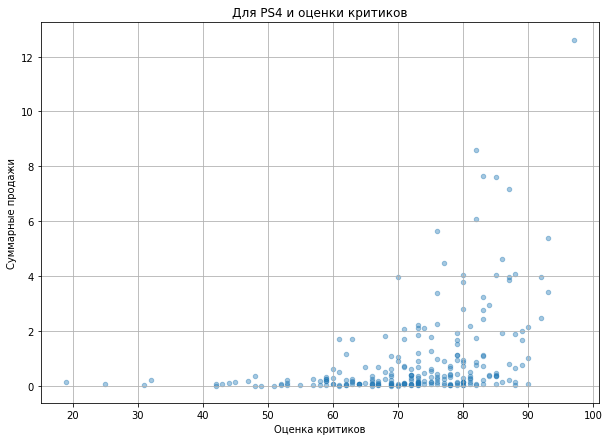

In [60]:
# отсортируем данные только для одной популярной платформы PS4
# строим диаграмму рассеивания 

ps4 = data.query("platform == 'PS4'")

ps4.plot(title='Для PS4 и оценки критиков',
         xlabel = 'Оценка критиков',
         ylabel = 'Суммарные продажи',
         kind='scatter', 
         x='critic_score', 
         y='total_sales', 
         alpha=0.4, 
         figsize=(10,7), 
         grid=True);

In [61]:
# посчитаем коэффицент корреляции Пирсона

ps4['critic_score'].corr(ps4['total_sales']).round(2)

0.4

График и коэффициент Пирсона говорит о том, что связь между продажами и оценкой критиков есть, но не сильная. То есть это взаимодейтсвие может срабатывать не во всех случаях.

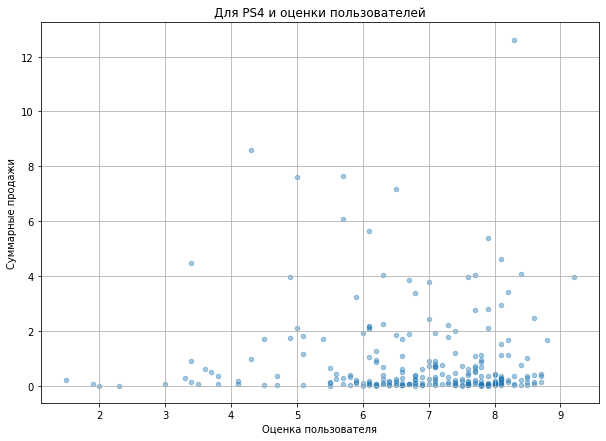

In [62]:
# строим диаграмму рассеивания с оценкой пользователей

ps4.plot(title='Для PS4 и оценки пользователей',
         xlabel = 'Оценка пользователя',
         ylabel = 'Суммарные продажи',
         kind='scatter', 
         x='user_score', 
         y='total_sales', 
         alpha=0.4, 
         figsize=(10,7), 
         grid=True);

In [63]:
# посчитаем коэффицент корреляции Пирсона

ps4['user_score'].corr(ps4['total_sales']).round(2)

-0.04

В случае с влиянием оценки пользователей на продажи, корреляции почти нет и это маленькое значение коэффицента еще и отрицвательное, то есть зависимость противоположная. 

Вывод из этого следует, что оценка критиков влияет на продажи, но не всегда, а оценка пользователей никак не влияет. Проверим это на других популярных платформах.

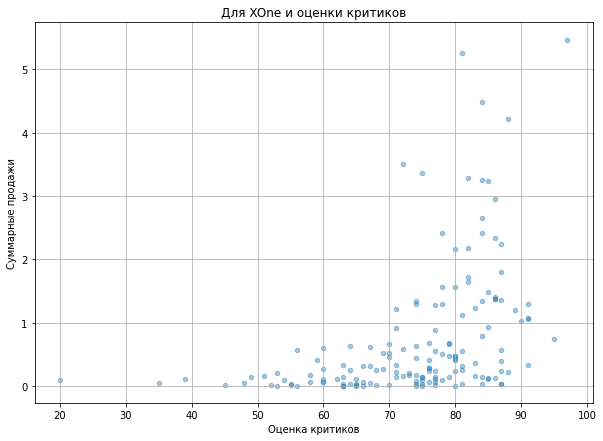

In [64]:
# отсортируем данные только для одной популярной платформы XOne
# строим диаграмму рассеивания 

xone = data.query("platform == 'XOne'")

xone.plot(title='Для XOne и оценки критиков',
         xlabel = 'Оценка критиков',
         ylabel = 'Суммарные продажи',
         kind='scatter', 
         x='critic_score', 
         y='total_sales', 
         alpha=0.4, 
         figsize=(10,7), 
         grid=True);

In [65]:
# посчитаем коэффицент корреляции Пирсона

xone['critic_score'].corr(xone['total_sales']).round(2)

0.43

График и коэффициент Пирсона, как и для PS4, говорит нам о том, что связь между продажами и оценкой критиков есть, но не сильная.

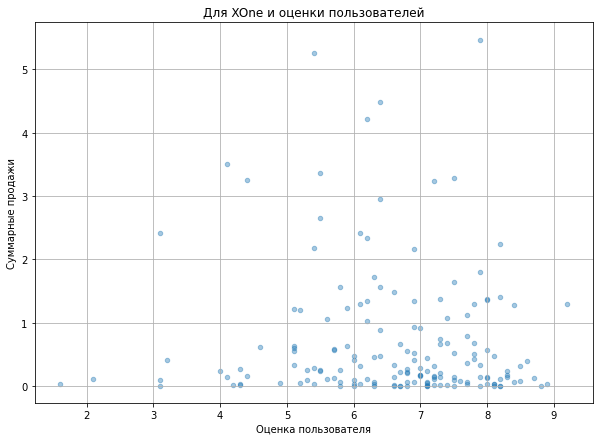

In [66]:
# строим диаграмму рассеивания с оценкой пользователей

xone.plot(title='Для XOne и оценки пользователей',
         xlabel = 'Оценка пользователя',
         ylabel = 'Суммарные продажи',
         kind='scatter', 
         x='user_score', 
         y='total_sales', 
         alpha=0.4, 
         figsize=(10,7), 
         grid=True);

In [67]:
# посчитаем коэффицент корреляции Пирсона

xone['user_score'].corr(xone['total_sales']).round(2)

-0.07

В случае с влиянием оценки пользователей на продажи для XOne, корреляции отрицвательная и значение чуть отличается от PS4, но все-таки так же не влияет на продажи. 

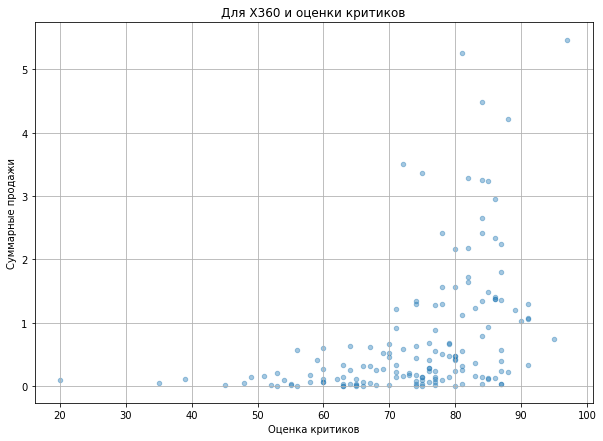

In [68]:
# отсортируем данные только для одной популярной платформы X360
# строим диаграмму рассеивания 

x360 = data.query("platform == 'XOne'")

x360.plot(title='Для X360 и оценки критиков',
         xlabel = 'Оценка критиков',
         ylabel = 'Суммарные продажи',
         kind='scatter', 
         x='critic_score', 
         y='total_sales', 
         alpha=0.4, 
         figsize=(10,7), 
         grid=True);

In [69]:
# посчитаем коэффицент корреляции Пирсона

x360['critic_score'].corr(x360['total_sales']).round(2)

0.43

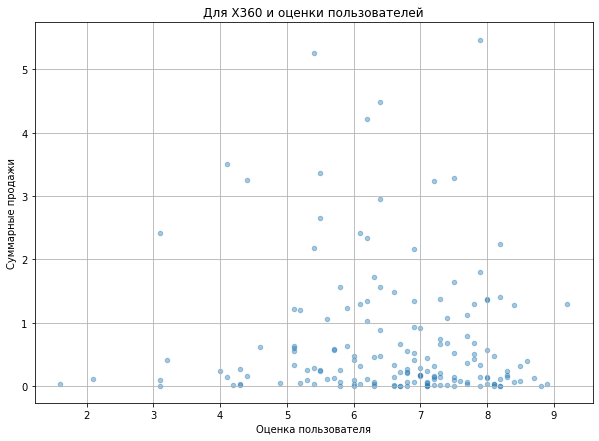

In [70]:
# строим диаграмму рассеивания с оценкой пользователей

x360.plot(title='Для X360 и оценки пользователей',
         xlabel = 'Оценка пользователя',
         ylabel = 'Суммарные продажи',
         kind='scatter', 
         x='user_score', 
         y='total_sales', 
         alpha=0.4, 
         figsize=(10,7), 
         grid=True);

In [71]:
x360['user_score'].corr(x360['total_sales']).round(2)

-0.07

Проверим еще на менее акутальной платформе - PC.

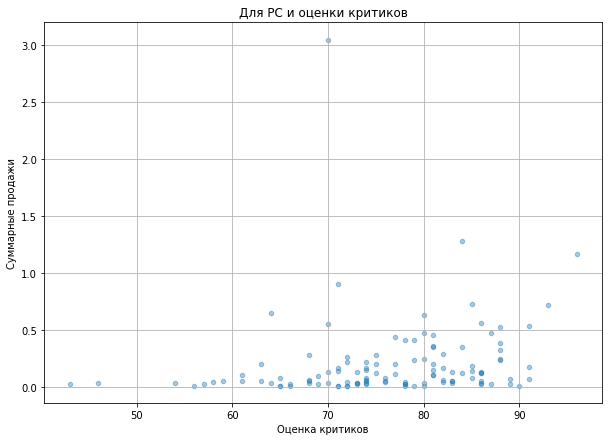

In [72]:
# отсортируем данные только для одной популярной платформы XOne
# строим диаграмму рассеивания 

pc = data.query("platform == 'PC'")

pc.plot(title='Для PC и оценки критиков',
         xlabel = 'Оценка критиков',
         ylabel = 'Суммарные продажи',
         kind='scatter', 
         x='critic_score', 
         y='total_sales', 
         alpha=0.4, 
         figsize=(10,7), 
         grid=True);

In [73]:
pc['critic_score'].corr(pc['total_sales']).round(2)

0.17

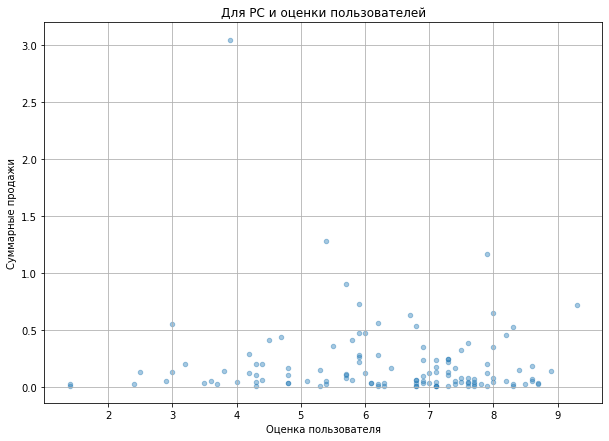

In [74]:
# строим диаграмму рассеивания с оценкой пользователей

pc.plot(title='Для PC и оценки пользователей',
         xlabel = 'Оценка пользователя',
         ylabel = 'Суммарные продажи',
         kind='scatter', 
         x='user_score', 
         y='total_sales', 
         alpha=0.4, 
         figsize=(10,7), 
         grid=True);

In [75]:
pc['user_score'].corr(pc['total_sales']).round(2)

-0.07

Для всех платформ связь между оценками критиков и пользователей с суммарными продажами слабая, но в некоторых случаях оценка критиков может слабо влиять на продажи.

**Посмотрим на общее распределение игр по жанрам.**

In [76]:
# выведем количество игр по жанрам и суммарные продажи

genre_count = data.pivot_table(index='genre', values='total_sales', aggfunc=['count','sum'])
genre_count.columns = ['count','sum']
genre_count.sort_values(by='sum', ascending=False)

,count,sum
genre,,
Action,619,199.36
Shooter,128,170.94
Sports,161,109.48
Role-Playing,221,101.44
Misc,113,37.55
Fighting,60,28.22
Racing,69,27.52
Platform,38,18.09
Adventure,185,17.55


In [77]:
# выведем среднее и медиану для каждого жанра

genre_sales = (data.pivot_table(index='genre', values='total_sales', aggfunc=['mean','median']).round(3))
genre_sales.columns = ['mean','median']
genre_sales.sort_values(by='mean', ascending=False)

,mean,median
genre,,
Shooter,1.335,0.515
Sports,0.680,0.180
Platform,0.476,0.140
Fighting,0.470,0.125
Role-Playing,0.459,0.110
Racing,0.399,0.090
Misc,0.332,0.090
Action,0.322,0.090
Simulation,0.298,0.100


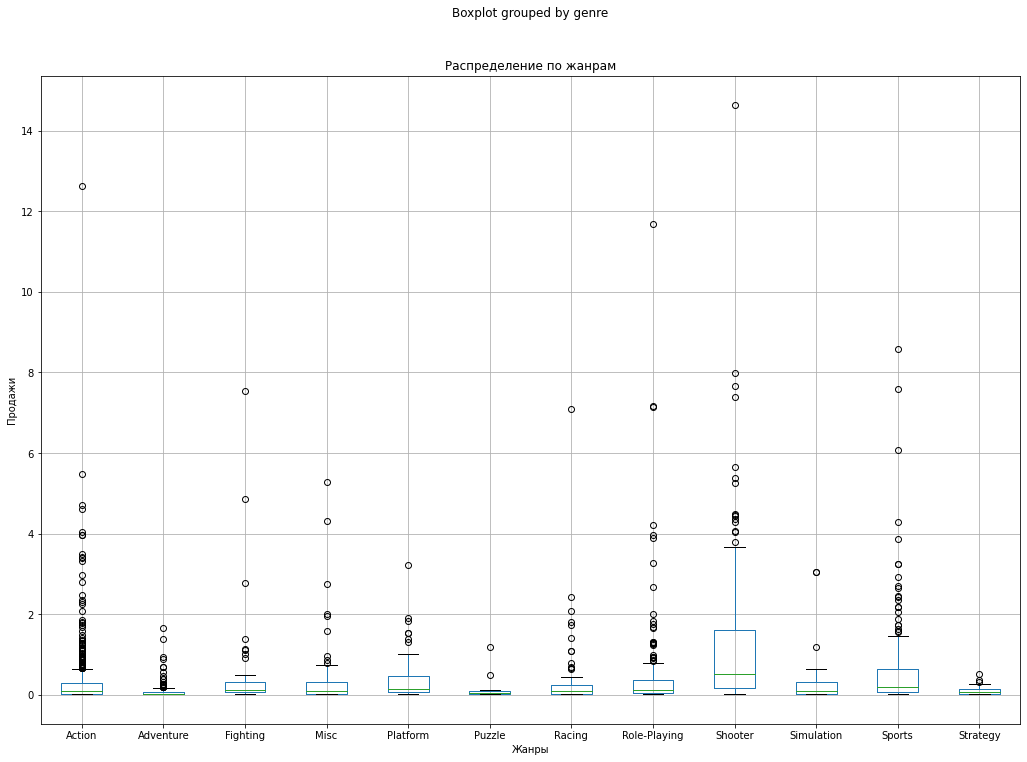

In [78]:
# построим дианраму размаха для всех жанров

(data.boxplot(by='genre', 
              column='total_sales',
              grid= True,
              figsize=(17,12))
 .set(title='Распределение по жанрам', 
      xlabel='Жанры', 
      ylabel='Продажи'));

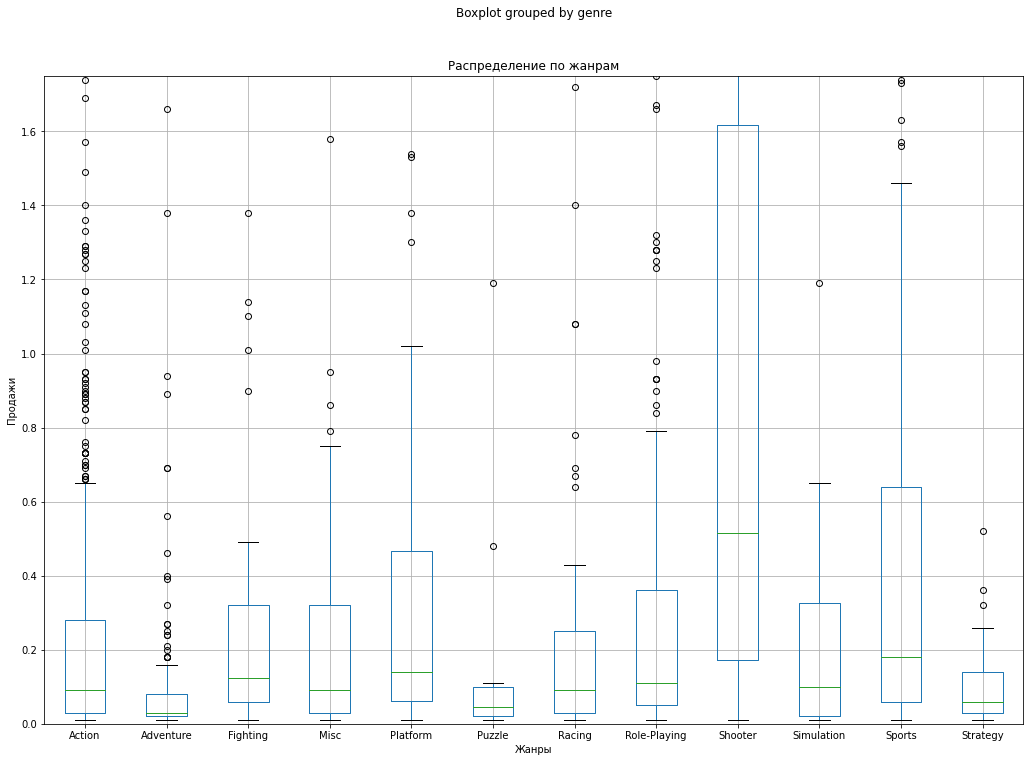

In [79]:
# построим укрупненную дианраму размаха для всех жанров

(data.boxplot(by='genre', 
              column='total_sales',
              grid= True,
              figsize=(17,12))
 .set(title='Распределение по жанрам', 
      xlabel='Жанры', 
      ylabel='Продажи',
     ylim=([0,1.75])));

Судя по средним и медианых показателям продаж, самые прибыльные 5 жанров: Shooter, Sports, Platform (это жанр видеоигр и поджанр экшн-игр, основной целью которых является перемещение персонажа игрока между точками в рендеринг-среде), а так же Fighting, Role-Playing.  
Самые низко прибыльные: Adventure, Puzzle, Strategy.     
При этом самые большие суммарны продажи у жанров: Action, Sports, Shooter, Role-Playing, Misc (игра в жанре аркада).    

**Вывод по этому шагу:**

- наиболее актуальный временной период для анализа с 2014 по 2016 год
- самые актуальные 5 платформ ``PS4, XOne, 3DS, PS3, X360, WiiU. И что стабильно держится PC.`` 
- отзывы критиков влияют на продажи, но слабо, тогда как пользовательский рейтинг не влияет никак на продажи
- самые популярные и доходные жанры ``Shooter, Sports, Platform, Fighting, Role-Playing``


### Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
- самые популярные платформы (топ-5)
- самые популярные жанры (топ-5)

И проверим влияет ли рейтинг ESRB на продажи в отдельном регионе.

**Найдем самые популярные топ-5 платформ для каждого региона**

In [80]:
# создадим сводную таблицу продаж в регионе NA по платформам

top5_platform_na = (data.pivot_table(index='platform', values=['na_sales', 'total_sales'], aggfunc='sum')
                    .sort_values(by='na_sales', ascending=False).head(5))

# добавим столбец с рассчитаной долей продаж от общей по каждой платформе

top5_platform_na['proportion'] = (top5_platform_na['na_sales'] / top5_platform_na['total_sales'] *100).round(2)
top5_platform_na

,na_sales,total_sales,proportion
platform,,,
PS4,98.61,288.15,34.22
XOne,81.27,140.36,57.90
X360,28.30,48.22,58.69
3DS,22.64,86.68,26.12
PS3,22.05,68.18,32.34


В Северной Америке самая топовая платформа PS4 по продажам, при этом у X360 самая большая доля в этом регионе от общих продаж - 59%. И очень большая доля продаж у XOne - 58%. Чуть больше половины всего рынка.

In [81]:
# создадим сводную таблицу продаж в регионе EU по платформам

top5_platform_eu = (data.pivot_table(index='platform', values=['eu_sales', 'total_sales'], aggfunc='sum')
                    .sort_values(by='eu_sales', ascending=False).head(5))

# добавим столбец с рассчитаной долей продаж от общей по каждой платформе

top5_platform_eu['proportion'] = (top5_platform_eu['eu_sales'] / top5_platform_eu['total_sales'] *100).round(2)
top5_platform_eu

,eu_sales,total_sales,proportion
platform,,,
PS4,130.04,288.15,45.13
XOne,46.25,140.36,32.95
PS3,25.54,68.18,37.46
PC,17.97,27.05,66.43
3DS,16.12,86.68,18.60


В Европе самая топовая платформа так же PS4 по продажам, при этом у PC (personal compoter) самая большая доля в этом регионе от общих продаж и составляет она 66%. А вот у PS4 вв Европе доля от всего рынка 45%, что почти половина всего рынка этой консоли.

In [82]:
# создадим сводную таблицу продаж в регионе JP по платформам

top5_platform_jp = (data.pivot_table(index='platform', values=['jp_sales', 'total_sales'], aggfunc='sum')
                    .sort_values(by='jp_sales', ascending=False).head(5))

# добавим столбец с рассчитаной долей продаж от общей по каждой платформе

top5_platform_jp['proportion'] = (top5_platform_jp['jp_sales'] / top5_platform_jp['total_sales'] *100).round(2)
top5_platform_jp

,jp_sales,total_sales,proportion
platform,,,
3DS,44.24,86.68,51.04
PS4,15.02,288.15,5.21
PSV,14.54,22.40,64.91
PS3,11.22,68.18,16.46
WiiU,7.31,42.98,17.01


In [83]:
# объединим в одну таблицу продажи по регионам, чтобы построить дальше круговый диаграммы

platform_sales_joined = (data.pivot_table(index = 'platform', 
                                          values = ['eu_sales','jp_sales','na_sales'], 
                                          aggfunc = 'sum'))
platform_sales_joined

,eu_sales,jp_sales,na_sales
platform,,,
3DS,16.12,44.24,22.64
PC,17.97,0.00,7.23
PS3,25.54,11.22,22.05
PS4,130.04,15.02,98.61
PSP,0.00,0.36,0.00
PSV,3.53,14.54,2.52
Wii,2.59,0.00,2.08
WiiU,13.15,7.31,19.36
X360,15.49,0.08,28.30


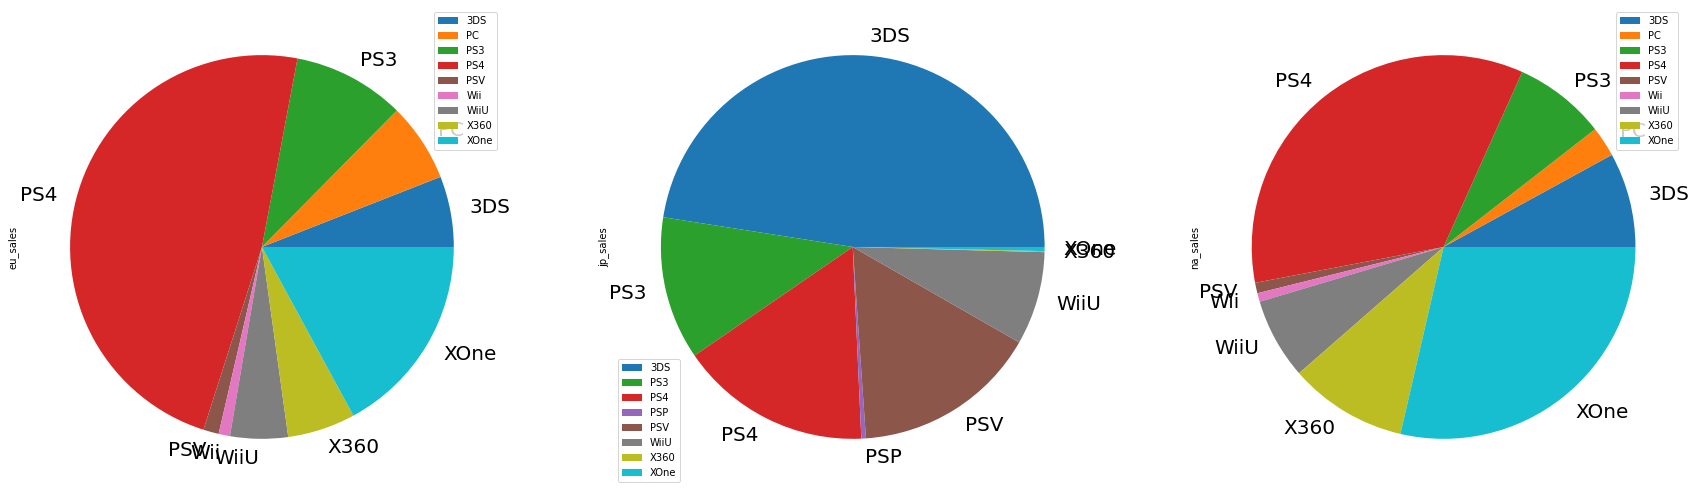

In [84]:
# построим круговые диаграммы

platform_sales_joined.plot.pie(subplots=True,
                               figsize=(30, 30),
                               layout=(3, 3),
                               fontsize=20);

В Японии топовая платформа 3DS (которая принадлеит Nintendo и соотвественно является японской разработкой) по продажам, при этом у PSV (Play Station Vita, компания производитель тоже японская в оригинале, хоть головной офис и находится теперь в США) самая большая доля в этом регионе от общих продаж и составляет она 65%. А доля 3DS при этом от общих мировых продаж 51%, что является половиной рынка. 

Во всех трех регионах в топ-5 платформ входит PS4 с разными долями: в Америке это 34%б в Европе 45% (почти половина рынка) и в Японии всего лишь 5%.  
В Америке и Европе на втором месте в рейтинге XOne и составляет доля ее продаж 58% и 33% соответственно.  
В Японии предпочтении отдано консолям от японских производителей: 3DS, PSV. С долями от мирового рынка 51% и 65% соответвенно. При этом PS4 тут на втором месте по продажам с долей мирового рынка всего лишь 5%.

**Найдем самые популярные топ-5 жанров для каждого региона**

In [85]:
# создадим сводную таблицу прода в регионе NA по жанрам

(data.pivot_table(index='genre', values='na_sales', aggfunc='sum')
 .sort_values(by='na_sales', ascending=False).head(5))

,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05


In [86]:
# создадим сводную таблицу прода в регионе EU по жанрам

(data.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
 .sort_values(by='eu_sales', ascending=False).head(5))

,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13


In [87]:
# создадим сводную таблицу прода в регионе JP по жанрам

(data.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
 .sort_values(by='jp_sales', ascending=False).head(5))

,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87


Для всех трех регионов есть пересечения в топ5 жанров. Это жанры: Action,  Shooter, Role-Playing. Они занимают разные места реатинго для разных регионов. Так в Северной Америке самый популярный жанр Shooter, в Европе - Action, а в Японии - Role-Playing.  
В Европе и Америке есть пересечение еще в жанре Sports, в Японии и Америке в жанре Misc (аркады), и отделельно в Европе появляется Racing, а в Японии Fighting.  
То есть есть три общих топовых жанра для всех трех регионов и есть предпочтительные для каждого. 

**Проверим влияет ли рейтинг ESRB на продажи в отдельном регионе.**

In [88]:
# построим сводную таблицу с суммарным и с долей продаж по регионам

(data.pivot_table(index = 'rating', 
                 values = ['eu_sales','jp_sales','na_sales'], 
                 aggfunc = ['sum','mean']).round(2))

sum                       mean                  
        eu_sales jp_sales na_sales eu_sales jp_sales na_sales
rating                                                       
E          58.06     8.94    50.74     0.27     0.04     0.23
E10+       26.16     4.46    33.23     0.14     0.02     0.18
M          93.44     8.01    96.42     0.35     0.03     0.36
T          34.07    14.78    38.95     0.13     0.05     0.14
unknown    58.95    56.90    64.72     0.08     0.08     0.09

Вспомним расшифровку аббривеатур рейтингов: 
- ``E`` - Everyone — для всех
- ``M`` - Mature — от 17 лет
- ``T`` - Teen — подросткам 13—19 лет
- ``E10+`` - Everyone 10 and older — для всех старше 10 лет 

По имеющейся информации можно сказать, что продажи в Европе и Северной Америке всегда выше, чем в Японии и между ними лишь небольшой разрыв.  
Самые большой доход в Европе и Северной Америке приходится на игры с рейтингом M, то есть для людей старше 17 лет.  
А в Японии самый большой доход у игр с рейтингом T, то есть для подростов 13-19 лет. 
Видимо целевые группы в этих регионах разные и рейтинг влияет.  
``Игры без рейтинга чаще всего покупают в Америке, при этом разница покупки таких игр в Европе и Японии маленькая. И в Европе игры без рейтинга покупают так же часто, как и игры с рейтингом E.`` 

**Вывод по этому шагу:**

- во всех трех регионах в топ-5 платформ входит PS4 с разными долями: в Америке это 34% в Европе 45% (почти половина рынка) и в Японии всего лишь 5%
- в Америке и Европе на втором месте в рейтинге XOne и составляет доля ее продаж 58% и 33% соответственно
- в Японии предпочтении отдано консолям от японских производителей: 3DS, PSV. С долями от мирового рынка 51% и 65% соответвенно
- среди топ5 жанров во всех регионах есть пересечение в трех:  Action,  Shooter, Role-Playing
- ESRB рейтинг влияет на продажи и судя по нему в разны регионах разная активная целевая аудитория у компьютерных игр
- самые большой доход в Европе и Северной Америке приходится на игры с рейтингом M, то есть для людей старше 17 лет.
- в Японии самый большой доход у игр с рейтингом T, то есть для подростов 13-19 лет
- продажи в Европе и Северной Америке всегда выше, чем в Японии и между ними лишь небольшой разрыв
- игры без рейтинга чаще всего покупают в Америке, при этом разница покупки таких игр в Европе и Японии маленькая. И в Европе игры без рейтинга покупают так же часто, как и игры с рейтингом E.

### Гипотезы

**Проверим следующие гипотезы:**
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- средние пользовательские рейтинги жанров Action и Sports разные

**Проверим гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC равны:**  
  
_Нулевая гипотеза (H0):_ средние пользовательские рейтинги платформ Xbox One и PC одинаковые (равны)  
_Альтернативная гипотеза (H1):_ средние пользовательские рейтинги платформ Xbox One и PC разные (не равны)


In [90]:
# отфильтруем все пропуски из пользовательского рейтинга 

data_user_score = data[(data['user_score'] >= 0)]

In [91]:
# создадим датасет только с патформой XOne и пользовательским рейтингом для нее

data_xone = data_user_score[data_user_score['platform'] == 'XOne']
xone = data_xone['user_score']
xone

165      7.9
179      5.4
242      6.4
270      6.2
373      4.1
        ... 
16544    6.8
16597    6.0
16630    8.2
16643    6.6
16660    6.7
Name: user_score, Length: 165, dtype: float64

In [92]:
# создадим датасет только с патформой PC и пользовательским рейтингом для нее

data_pc = data_user_score[data_user_score['platform'] == 'PC']
pc = data_pc['user_score']
pc

458      3.9
1530     5.4
1730     7.9
2303     5.7
2784     5.9
        ... 
16456    8.3
16463    6.8
16509    7.9
16518    1.4
16692    7.6
Name: user_score, Length: 122, dtype: float64

In [93]:
# проверим гипотезу для средних пользовательских рейтингов платформ Xbox One и PC

alpha = .05

results = st.ttest_ind(xone, pc)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отклоняем нулевую гипотезу")
else:
    print("Не можем отклонить нулевую гипотезу")

p-значение: 0.10450507919348415
Не можем отклонить нулевую гипотезу


**Вывод:** гипотеза подтвердилась, средние пользовательские рейтинги платформ XBox One и PC одинаковые (равны)

**Проверим гипотезу, что средние пользовательские рейтинги жанров Action и Sports разные:**  
  
_Нулевая гипотеза:_ cредние пользовательские рейтинги жанров Action и Sports одинаковые (равны)   
_Альтернативная гипотеза:_ cредние пользовательские рейтинги жанров Action и Sports разные (не равны)  

In [94]:
# создадим датасет только с жанром Action и пользовательским рейтингом для него

data_action = data_user_score[data_user_score['genre'] == 'Action']
action = data_action['user_score']
action

42       8.3
165      7.9
231      8.1
295      6.3
304      4.9
        ... 
16544    6.8
16597    6.0
16652    8.5
16660    6.7
16692    7.6
Name: user_score, Length: 297, dtype: float64

In [95]:
# создадим датасет только с жанром Sports и пользовательским рейтингом для него

data_sports = data_user_score[data_user_score['genre'] == 'Sports']
sports = data_sports['user_score']
sports

77       4.3
94       5.0
143      5.7
264      4.5
314      6.7
        ... 
16120    6.3
16142    8.8
16146    6.9
16518    1.4
16643    6.6
Name: user_score, Length: 127, dtype: float64

In [96]:
# проверим гипотезу для средних пользовательских рейтингов платформ жанров Action и Sports

alpha = .05

results = st.ttest_ind(action, sports)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отклоняем нулевую гипотезу")
else:
    print("Не можем отклонить нулевую гипотезу")

p-значение: 2.8711147985105864e-19
Отклоняем нулевую гипотезу


**Вывод:** гипотеза подтвердилась, средние пользовательские рейтинги жанров Action и Sports разные

**Вывод по этому шагу:**  
- обе гипотезы подтвердились
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые (равны)
- средние пользовательские рейтинги жанров Action и Sports разные
  
**Пояснение:** 
  
_Как вы сформулировали нулевую и альтернативную гипотезы:_ исходя из того, что нулевая гипотеза всегда утвердительна, а альтернативная ей имеет обратную формулировку  
  
_Какой критерий применили для проверки гипотез и почему:_ t-тест и в нем метод для проверки двустронней гипотезы о равенстве среднего генеральной совокупноси, потому что в обоих случаях у нас две выборки независимые друг от друга и этот метод походит наилучшим образом

### Общий вывод

Была проведена обработка исторические данных о продажах игр, в ходе которой был проведены подготовка и исследоваетельский анализ данных, выявлен наиболее подходящий временной промежуток для анализа и составлен портрет пользователя для каждого региона, а так же проверены гипотезы о пользовательских оценках. 

**При подготовке данных было сделано:**
- изменен тип данных у year_of_release и user_score
- удалены строки без названия игр и жанра
- удалены строки без указанного года выпуска игры
- пропуски в столбце rating замены заглушкой 'unknown'
- оставлены пропуски в critic_score, user_score, чтобы не было выбросов в данных в дальнейшем анализе
- посчитаны общую сумму продаж по всем регионам для каждой игры и добавили значения в новый столбец
  
**При изучении данных выявлено следующее:**
- наиболее актуальный временной период для анализа с 2014 по 2016 год
- самые актуальные 5 платформ ``PS4, XOne, 3DS, PS3, X360, WiiU, и стабильно держится PC.`` 
- отзывы критиков влияют на продажи, но слабо, тогда как пользовательский рейтинг не влияет никак на продажи
- самые популярные и доходные жанры ``Shooter, Sports, Platform, Fighting, Role-Playing``
  
**При изучении портрета пользователя по регионам выявлено:**
- во всех трех регионах в топ-5 платформ входит PS4 с разными долями: в Америке это 34%б в Европе 45% (почти половина рынка) и в Японии всего лишь 5%
- в Америке и Европе на втором месте в рейтинге XOne и составляет доля ее продаж 58% и 33% соответственно
- в Японии предпочтении отдано консолям от японских производителей: 3DS, PSV. С долями от мирового рынка 51% и 65% соответвенно
- среди топ5 жанров во всех регионах есть пересечение в трех: Action, Shooter, Role-Playing
- ESRB рейтинг влияет на продажи 
- судя по ESRB рейтингу в Европе и Северной Америке самая большая аудитория приходится на игры с рейтингом M, то есть для людей старше 17 лет
- в Японии самый большой доход у игр с рейтингом T, то есть для подростов 13-19 лет продажи 
- в Европе и Северной Америке всегда выше, чем в Японии и между ними лишь небольшой разрыв
- игры без рейтинга чаще всего покупают в Америке, при этом разница покупки таких игр в Европе и Японии маленькая. И в Европе игры без рейтинга покупают так же часто, как и игры с рейтингом E.
  
**Были выдвинуты следующие гипотезы:**
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- средние пользовательские рейтинги жанров Action и Sports разные

При проверки гипотезы подтвердились, что говорит об одинаковом пользовательском рейтинге для платформ XBox One и PC, и разном пользовательском рейтинг для жанров Action и Sports